<a href="https://colab.research.google.com/github/RafaelColin/EDP/blob/main/Ecuaci%C3%B3n_del_calor_M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = green>Método implícito de Richardson

Resolver la ecuación del calor $u_{t} $ = $u_{xx} $ con condiciones de Dirichlet
Método: Usaremos el método implícito de Richardson para la discretización temporal
y diferencias finitas para la espacial.

Use los tamaños de paso  $ h =0.1$ y $ k=0.01$ para aproximar la solucion de la ecuacion de calor

$$\frac{\partial U}{\partial t}(x,t) = \alpha^2 \frac{\partial U}{\partial t}(x,t), 0<x<1 y  0 \leq t $$

##con condiciones de frontera:

$$u(0,t) = u(1,t) = 0 , 0<t, $$

##y condiciones iniciales:

$$u(x,0) = sen(\pi x), 0\leq x \leq 1. $$

La ecuación en diferencias para el método implícito estándar es:

$$\frac{u_{i,j+1} - u_{i,j}}{k} = \alpha^2 \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}$$

Reorganizando, se obtiene:

$$ (1 + 2r) u_{i,j} - r u_{i+1,j} - r u_{i-1,j} = u_{i,j-1}$$

donde $r= \alpha^2 \frac{k}{h^2}$

Este método es implícito porque las incógnitas en el tiempo  $j+1$  ( $u_{i,j+1} $) están acopladas entre sí, formando un sistema de ecuaciones lineales que debe resolverse en cada paso de tiempo. Esto asegura estabilidad numérica incluso para pasos de tiempo relativamente grandes, como en este caso con  r  posiblemente mayor que 1/2. Las condiciones de frontera se incorporan directamente en el sistema, y la condición inicial establece los valores en  j=0


In [77]:
import sympy as sp #Permite trabajar con variables algebraicas, ecuaciones, derivadas, integrales, etc.
import numpy as np #Librería para cálculo numérico en Python.
import matplotlib.pyplot as plt # Librería para crear visualizaciones en 2D y 3D; pyplot es un módulo que ofrece una interfaz similar a MATLAB para generar gráficos.
from mpl_toolkits.mplot3d import Axes3D # Permite crear gráficos 3D en Matplotlib.
from matplotlib import cm #cm (colormaps) proporciona colores para visualizar datos en 2D/3D
from matplotlib.animation import FuncAnimation, PillowWriter #Clase para crear animaciones en matplotlib.
from scipy.sparse import diags #Construye matrices dispersas a partir de diagonales. Ideal para matrices grandes con muchos ceros (como matrices tridiagonales).
import warnings #Importa el módulo de warnings de Python, que maneja las advertencias del sistema
warnings.filterwarnings('ignore') #Configura el sistema de advertencias para ignorar todas las advertencias.

Definición de la función inicial que calcula el seno de π multiplicado por x:

In [78]:
def f(x): # Declaración de función en Python
  return np.sin(np.pi*x)  # Resultado del seno

#<font color = green>Construcción de la matriz A (Ejercicio 1)

    Construye la matriz tridiagonal A de tamaño n x n
    Matriz tridiagonal con 3 en diagonal y -1 en sub/super diagonal

In [79]:
def construir_matriz_A(n):
    A = diags([-1, 3, -1], [-1, 0, 1], shape=(n, n)).toarray()
    return sp.Matrix(A)
    # Construir matriz de 9x9
A = construir_matriz_A(9)
print("Matriz A:")
A

Matriz A:


Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

#<font color = green>Construcción del vector b (Ejercicio 2)
    Construye el vector b usando la función f(x)

In [80]:
def construir_vector_b(n):
    x_vals = np.linspace(0.1, 0.9, n)
    b_vals = [f(x) for x in x_vals] # Crear el vector b usando comprensión de lista
    return sp.Matrix(b_vals)

b = construir_vector_b(9)
print("\nVector b:")
b


Vector b:


Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Solución directa (para referencia)

La factorización $LU$ descompone una matriz $A$ en el producto de dos matrices

Donde:

$L$: Matriz triangular inferior

$U$: Matriz triangular superior

In [81]:
solucion_directa = A.LUsolve(b)
print("\nSolución directa (A\\b):")
solucion_directa


Solución directa (A\b):


Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Implementación del método de Richardson para resolver el sistema evolutivo
    
    Parámetros:
    A: Matriz del sistema
    b: Vector inicial
    j: Número de pasos temporales
    
    Retorna:
    S: Matriz con todas las soluciones en el tiempo

In [82]:
def richardson(A, b, j):
    S = []
    b_actual = b.copy()

    for i in range(j + 1):
        # Guardar el estado actual
        S.append(np.array(b_actual, dtype=float).flatten())
        # Resolver el sistema para el siguiente paso temporal
        solucion = A.LUsolve(b_actual)
        b_actual = solucion

    return np.array(S)

Parámetros y ejecución

In [83]:
j = 20  # Número de pasos en el tiempo
U = richardson(A, b, j)

print(f"U: {U.shape}")  # Debería ser (j+1, 9)

U: (21, 9)


Malla para visualización

In [84]:
x = np.linspace(0, 1, 9)  # Nodos internos en X
y = np.linspace(0, 0.6, j + 1)  # Tiempo (debe coincidir con j)
X, Y = np.meshgrid(x, y)

print(f"X: {X.shape}, Y: {Y.shape}")

X: (21, 9), Y: (21, 9)


Gráfica de contorno

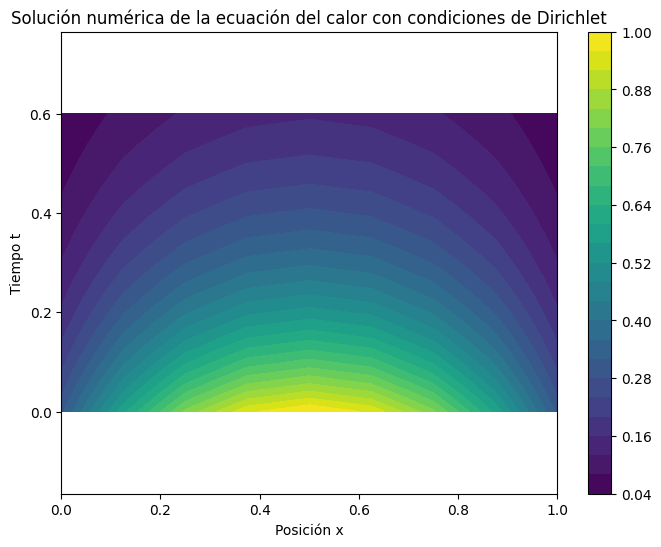

In [85]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de la ecuación del calor con condiciones de Dirichlet')
plt.xlabel('Posición x')
plt.ylabel('Tiempo t')
plt.axis('equal')
plt.show()

Explicación: La gráfica muestra la evolución temporal de la temperatura.

Los colores representan la amplitud de u(x,t).

Gráfica 3D

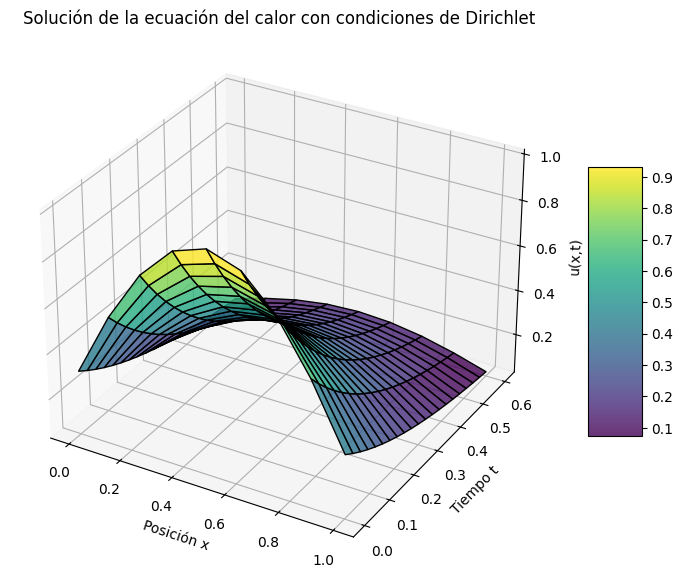

In [86]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k', alpha=0.8)
ax.set_title('Solución de la ecuación del calor con condiciones de Dirichlet')
ax.set_xlabel('Posición x')
ax.set_ylabel('Tiempo t')
ax.set_zlabel('u(x,t)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Explicación: La superficie 3D muestra la evolución completa de la solución.

Animación 2D (Evolución en el tiempo)

In [87]:
%matplotlib inline
# Usamos inline para evitar problemas con notebook
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, U[0], lw=2, color='blue')

ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')
ax.grid(True)

def update_2d(k):
    line.set_ydata(U[k])
    ax.set_title(f'Tiempo = {y[k]:.3f}')
    return line,

# Asignamos la animación a una variable
anim_2d = FuncAnimation(fig, update_2d, frames=len(y), interval=200, blit=True)

# Mostramos la animación
from IPython.display import HTML
HTML(anim_2d.to_jshtml())

# Cerramos la figura para liberar memoria
plt.close(fig)
# Eliminar el objeto de animación para evitar problemas de limpieza posteriores
del anim_2d

Guardar animación como GIF

In [88]:
fig_save, ax_save = plt.subplots(figsize=(8, 5))
line_save, = ax_save.plot(x, U[0], lw=2, color='blue')
ax_save.set_ylim(np.min(U), np.max(U))
ax_save.set_xlabel('x')
ax_save.set_ylabel('u(x,t)')
ax_save.set_title('Evolución en el tiempo')
ax_save.grid(True)

def update_save(k):
    line_save.set_ydata(U[k])
    ax_save.set_title(f'Tiempo = {y[k]:.3f}')
    return line_save,

# Asignamos y guardamos la animación
anim_save = FuncAnimation(fig_save, update_save, frames=len(y), interval=200, blit=True)

# Guardar como GIF
writer = PillowWriter(fps=5)
anim_save.save("animacion_richardson.gif", writer=writer)

# Cerramos la figura después de guardar
plt.close(fig_save)
# Eliminar el objeto de animación para evitar problemas de limpieza posteriores
del anim_save

Animación 3D

In [89]:
fig_3d = plt.figure(figsize=(10, 7))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Creamos la superficie inicial
surf_3d = ax_3d.plot_surface(X, Y, U, cmap=cm.viridis, alpha=0.7)
line_3d, = ax_3d.plot(x, y[0] * np.ones_like(x), U[0], color='red', lw=3)

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('t')
ax_3d.set_zlabel('u(x,t)')
ax_3d.set_title("Evolución temporal - Paso 0/{}".format(len(y)-1))

def update_3d(k):
    # Actualizamos solo la línea roja, no recreamos toda la superficie
    line_3d.set_data(x, y[k] * np.ones_like(x))
    line_3d.set_3d_properties(U[k])
    ax_3d.set_title(f"Evolución temporal - Paso {k}/{len(y)-1}")
    return line_3d,

anim_3d = FuncAnimation(fig_3d, update_3d, frames=len(y), interval=200, blit=True)

# Mostramos la animación 3D
HTML(anim_3d.to_jshtml())

# Cerramos la figura
plt.close(fig_3d)
# Eliminar el objeto de animación para evitar problemas de limpieza posteriores
del anim_3d

#<font color = green>Ejercicio 3:

#Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).


Resolvemos la ecuación del calor utilizando un método implícito y comparamos la solución numérica con la solución exacta y la graficamos.

    Solución exacta de u_t = u_xx con u(x,0)=sin(pi*x) y condiciones Dirichlet

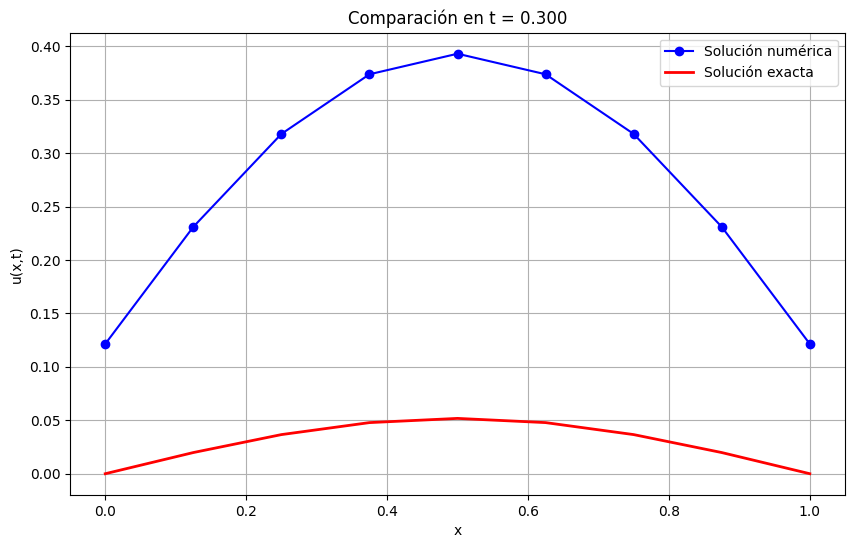

Error máximo en t=0.300: 3.41e-01


In [90]:
def solucion_exacta(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

# Tomar un tiempo específico
t_idx = 10
t_especifico = y[t_idx]

# Calcular solución exacta en ese tiempo
u_exacta = solucion_exacta(x, t_especifico)
u_numerica = U[t_idx]

# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(x, u_numerica, 'bo-', label='Solución numérica', markersize=6)
plt.plot(x, u_exacta, 'r-', label='Solución exacta', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Comparación en t = {t_especifico:.3f}')
plt.legend()
plt.grid(True)
plt.show()

# Calcular error
error = np.abs(u_numerica - u_exacta)
print(f"Error máximo en t={t_especifico:.3f}: {np.max(error):.2e}")

#<font color = green>Ejercicio 4:

#*¿Es* necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?
Al ser simetrico el sistema 9x9, no es necesario resolcerlo todo.

Para este problema particular con coeficientes constantes y geometría simple,
podríamos usar el método de separación de variables que nos da la solución exacta directamente.
Sin embargo, el método numérico es más general y puede aplicarse a problemas más complejos
con coeficientes variables o geometrías irregulares donde la solución analítica no es posible.

Es posible simplificar debido a su estructura simétrica y tridiagonal, e incluso evitar completamente la resolución del sistema para este problema específico.

    °Simetria:
    La matriz cumple que $A = A^T$, es decir, los elementos fuera de la diagonal son simétricos $a_{i,j} = a_{j,i} $.
    Esto significa que no necesitas almacenar o manipular toda la matriz; basta con conocer la diagonal principal y una de las subdiagonales.

    °Almacenamiento reducido: En lugar de trabajar con los 81 elementos de la matriz 9×9, solo necesitas:
    La diagonal principal: todos los elementos son 3.
    La subdiagonal: todos los elementos son -1.
    El tamaño n=9

¿Por qué funciona esto?

La matriz $A$ se obtiene al discretizar la ecuación de calor usando el método implicito de diferencias finitas. Para la condición inicial $sin(πx)$, la solución mantiene la misma forma espacial y solo experimenta un decaimiento exponencialmente en el tiempo. La simetría observada en la matriz A es un reflejo directo de la simetría física inherente al problema de conducción de calor en un dominio uniforme.

-Discretización implícita:Método numérico estable que calcula la solución en el tiempo futuro usando información de ese mismo instante

-Condición inicial sinusoidal: Las autofunciones como sin(πx) son modos naturales del operador de Laplace.

-Decaimiento exponencial: Resultado de la naturaleza difusiva de la ecuación del calor $u_{t} $ = $αu_{xx} $.

-Simetría matricial: Surge de la uniformidad del medio y las condiciones de frontera simétricas.

#<font color = green>Ejercicio 5:

#Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

Detalle con la precisión de las gráficas:

El método de Richardson usado aquí es implícito y numéricamente estable, pero la precisión depende de:
1. El tamaño de la malla espacial (h) - aquí tenemos solo 9 puntos
2. El paso temporal implícito en la iteración
3. La aproximación por diferencias finitas

La principal limitación es el bajo número de puntos espaciales (solo 9), lo que puede causar que la solución numérica no capture completamente los detalles de la solución exacta, especialmente cerca de las fronteras.

Como en el caso visto en clase, que la grafica iba de 0 a 1, cuando deberia ser de $x>0$ y $y<1$, donde $x$ es el punto donde empiza la grafica y $y$ el punto donde finaiza la grafica, ya que al momento de generar la malla aunque el rango es de 0 a 1, se pierden cachitos en la frontera. (Cosa que en mi grafica si se concidera y el rango es un poco menor al de 0 a 1)

In [91]:
plt.close('all')